# Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
houseprices=pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\LinR project 29\\DATABASE\\Houseprices.csv')

In [3]:
houseprice=pd.DataFrame(houseprices)

In [4]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
c=houseprice[['Id','SalePrice','LotArea','GarageArea','GrLivArea','YearBuilt','YrSold',
   'LotShape','RoofStyle','RoofMatl','Fence','Exterior1st','GarageType',
   'Foundation','Neighborhood','HouseStyle','BldgType','SaleCondition',
    'CentralAir','Heating','Electrical','ExterQual']]

In [6]:
c.to_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\table_20.csv',index=False)

In [7]:
c=pd.DataFrame(c)

In [8]:
c.head()

,Id,SalePrice,LotArea,GarageArea,GrLivArea,YearBuilt,YrSold,LotShape,RoofStyle,RoofMatl,...,GarageType,Foundation,Neighborhood,HouseStyle,BldgType,SaleCondition,CentralAir,Heating,Electrical,ExterQual
0,1,208500,8450,548,1710,2003,2008,Reg,Gable,CompShg,...,Attchd,PConc,CollgCr,2Story,1Fam,Normal,Y,GasA,SBrkr,Gd
1,2,181500,9600,460,1262,1976,2007,Reg,Gable,CompShg,...,Attchd,CBlock,Veenker,1Story,1Fam,Normal,Y,GasA,SBrkr,TA
2,3,223500,11250,608,1786,2001,2008,IR1,Gable,CompShg,...,Attchd,PConc,CollgCr,2Story,1Fam,Normal,Y,GasA,SBrkr,Gd
3,4,140000,9550,642,1717,1915,2006,IR1,Gable,CompShg,...,Detchd,BrkTil,Crawfor,2Story,1Fam,Abnorml,Y,GasA,SBrkr,TA
4,5,250000,14260,836,2198,2000,2008,IR1,Gable,CompShg,...,Attchd,PConc,NoRidge,2Story,1Fam,Normal,Y,GasA,SBrkr,Gd


In [9]:
table_20=c

In [10]:
table_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   GarageArea     1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YrSold         1460 non-null   int64 
 7   LotShape       1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  Fence          281 non-null    object
 11  Exterior1st    1460 non-null   object
 12  GarageType     1379 non-null   object
 13  Foundation     1460 non-null   object
 14  Neighborhood   1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  BldgType       1460 non-null   object
 17  SaleCondition  1460 non-null   object
 18  CentralAir     1460 non-null

### "Since Fence has only 20% non null data, so we are dropping the columning for analysis"

In [11]:
table_20 = table_20.drop(['Fence'],1)

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\2385277469.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table_20 = table_20.drop(['Fence'],1)


In [12]:
table_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   GarageArea     1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YrSold         1460 non-null   int64 
 7   LotShape       1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  Exterior1st    1460 non-null   object
 11  GarageType     1379 non-null   object
 12  Foundation     1460 non-null   object
 13  Neighborhood   1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  CentralAir     1460 non-null   object
 18  Heating        1460 non-null

In [13]:
table_20.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### "Since SBrkr is used most frequently so we will replace null value by SBrkr"

In [14]:
table_20['Electrical'].fillna('SBrkr',inplace=True)

In [15]:
table_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   GarageArea     1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YrSold         1460 non-null   int64 
 7   LotShape       1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  Exterior1st    1460 non-null   object
 11  GarageType     1379 non-null   object
 12  Foundation     1460 non-null   object
 13  Neighborhood   1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  CentralAir     1460 non-null   object
 18  Heating        1460 non-null

In [16]:
table_20.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### "6% of data in GarageType contains null values"

In [17]:
table_20.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [18]:
table_20.GarageType.count()


1379

### "Since Attchd  is used most frequently so we will replace null value by Attchd" 

In [19]:
table_20['GarageType'].fillna('Attchd',inplace=True)


In [20]:
table_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   GarageArea     1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YrSold         1460 non-null   int64 
 7   LotShape       1460 non-null   object
 8   RoofStyle      1460 non-null   object
 9   RoofMatl       1460 non-null   object
 10  Exterior1st    1460 non-null   object
 11  GarageType     1460 non-null   object
 12  Foundation     1460 non-null   object
 13  Neighborhood   1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  CentralAir     1460 non-null   object
 18  Heating        1460 non-null

In [21]:
table_20.to_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\cleaned_data.csv',index=False)

In [22]:
cleaned_data=pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\cleaned_data.csv')

In [23]:
cleaned_data.head()

,Id,SalePrice,LotArea,GarageArea,GrLivArea,YearBuilt,YrSold,LotShape,RoofStyle,RoofMatl,...,GarageType,Foundation,Neighborhood,HouseStyle,BldgType,SaleCondition,CentralAir,Heating,Electrical,ExterQual
0,1,208500,8450,548,1710,2003,2008,Reg,Gable,CompShg,...,Attchd,PConc,CollgCr,2Story,1Fam,Normal,Y,GasA,SBrkr,Gd
1,2,181500,9600,460,1262,1976,2007,Reg,Gable,CompShg,...,Attchd,CBlock,Veenker,1Story,1Fam,Normal,Y,GasA,SBrkr,TA
2,3,223500,11250,608,1786,2001,2008,IR1,Gable,CompShg,...,Attchd,PConc,CollgCr,2Story,1Fam,Normal,Y,GasA,SBrkr,Gd
3,4,140000,9550,642,1717,1915,2006,IR1,Gable,CompShg,...,Detchd,BrkTil,Crawfor,2Story,1Fam,Abnorml,Y,GasA,SBrkr,TA
4,5,250000,14260,836,2198,2000,2008,IR1,Gable,CompShg,...,Attchd,PConc,NoRidge,2Story,1Fam,Normal,Y,GasA,SBrkr,Gd


# Knowing our Data

In [24]:
cleaned_data.describe()

,Id,SalePrice,LotArea,GarageArea,GrLivArea,YearBuilt,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,10516.828082,472.980137,1515.463699,1971.267808,2007.815753
std,421.610009,79442.502883,9981.264932,213.804841,525.480383,30.202904,1.328095
min,1.000000,34900.000000,1300.000000,0.000000,334.000000,1872.000000,2006.000000
25%,365.750000,129975.000000,7553.500000,334.500000,1129.500000,1954.000000,2007.000000
50%,730.500000,163000.000000,9478.500000,480.000000,1464.000000,1973.000000,2008.000000
75%,1095.250000,214000.000000,11601.500000,576.000000,1776.750000,2000.000000,2009.000000
max,1460.000000,755000.000000,215245.000000,1418.000000,5642.000000,2010.000000,2010.000000


## Replacing Outliers

<AxesSubplot:>

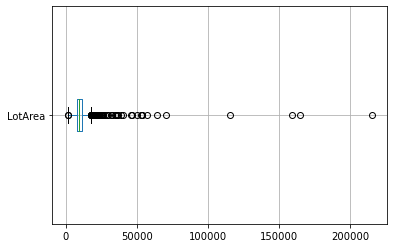

In [25]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('LotArea', vert=False)

In [26]:
median= 9478.5
iqr = 11601.5 - 7553.5
ub = 11601.5 + 1.5*(11601.5 - 7553.5)
lb = 7553.5 - 1.5*(11601.5 - 7553.5)
cleaned_data['LotAreaNew'] = np.where(np.logical_or(cleaned_data.LotArea<lb, cleaned_data.LotArea>ub),9478.5, cleaned_data.LotArea)

<AxesSubplot:>

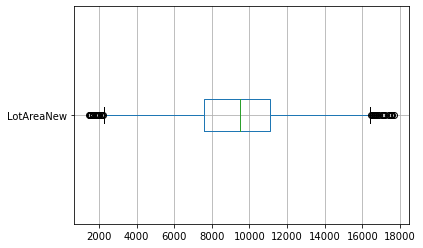

In [27]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('LotAreaNew', vert=False)

In [28]:
cleaned_data.GarageArea.describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

<AxesSubplot:>

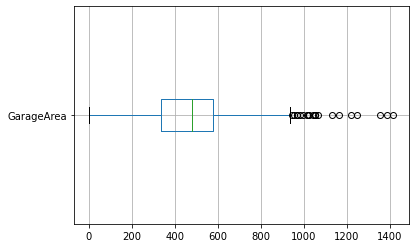

In [29]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('GarageArea', vert=False)

In [30]:
median= 480.0
iqr = 576.0-334.5
ub = 576.0 + 1.5*(576.0-334.5)
lb = 334.5 - 1.5*(576.0-334.5)
cleaned_data['GarageAreaNew'] = np.where(np.logical_or(cleaned_data.GarageArea<lb, cleaned_data.GarageArea>ub),480.0, cleaned_data.GarageArea)

<AxesSubplot:>

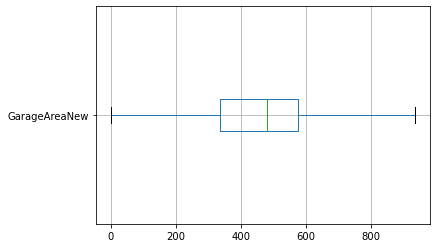

In [31]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('GarageAreaNew', vert=False)

In [32]:
cleaned_data.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:>

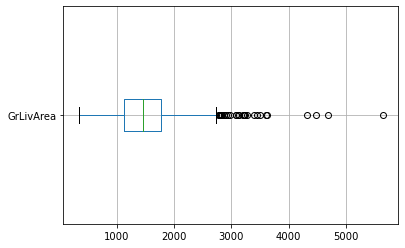

In [33]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('GrLivArea', vert=False)

In [34]:
median= 1464.00
iqr = 1776.75-1129.50
ub = 1776.75 + 1.5*(1776.75-1129.50)
lb = 1129.50 - 1.5*(1776.75-1129.50)
cleaned_data['GrLivAreaNew'] = np.where(np.logical_or(cleaned_data.GrLivArea<lb, cleaned_data.GrLivArea>ub),480.0, cleaned_data.GrLivArea)

<AxesSubplot:>

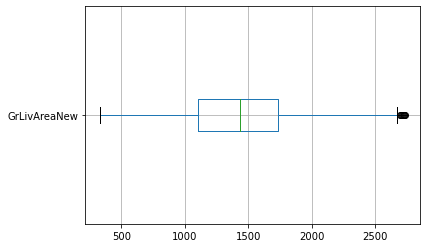

In [35]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('GrLivAreaNew', vert=False)

In [36]:
cleaned_data.YearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [37]:
median= 1973
iqr = 2000-1954
ub = 2000 + 1.5*(2000-1954)
lb = 1954 - 1.5*(2000-1954)
cleaned_data['YearBuiltNew'] = np.where(np.logical_or(cleaned_data.YearBuilt<lb, cleaned_data.YearBuilt>ub),1973, cleaned_data.YearBuilt)

<AxesSubplot:>

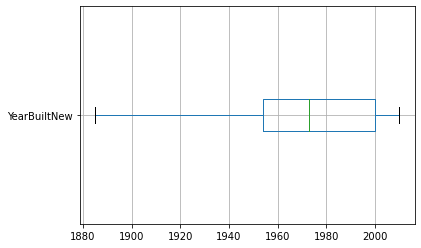

In [38]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('YearBuiltNew', vert=False)

In [39]:
cleaned_data.YrSold.describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

<AxesSubplot:>

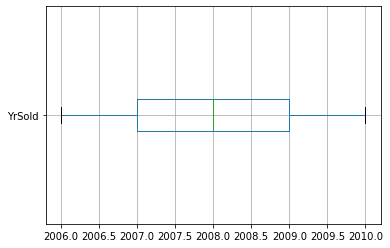

In [40]:
plt.figure(figsize=(6,4))
cleaned_data.boxplot('YrSold', vert=False)

#  SELECTING ONLY THE CONTINIOUS VARIABLE 

### CORELATION BETWEEN CONTINIOUS VARIABLES

In [41]:
continious_var=cleaned_data[['LotAreaNew','GarageAreaNew','GrLivAreaNew','YearBuiltNew','YrSold','SalePrice']]

<AxesSubplot:>

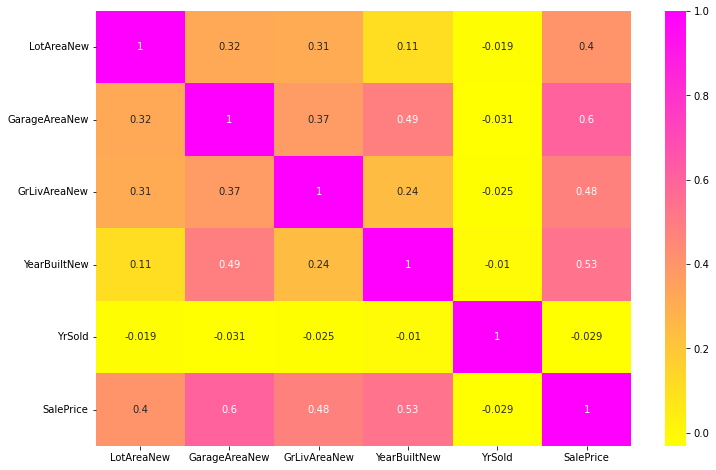

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(continious_var.corr(), annot=True,cmap='spring_r')

### "we can say GrageAreaNew is highly corilated with salesprice and year_sold is least corelated with salesprice"

### SalePrice is Linear with LotArea

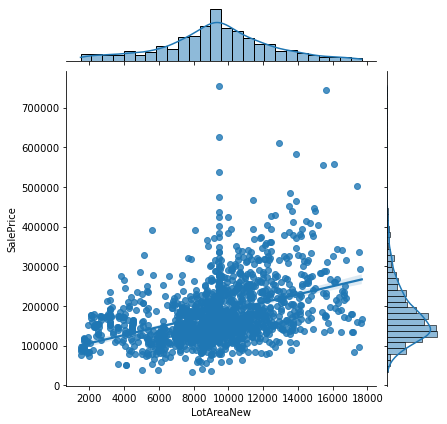

In [43]:
sns.jointplot(x= "LotAreaNew", y= "SalePrice", kind= "reg", data = cleaned_data)

### SalePrice is Linear with GrageArea

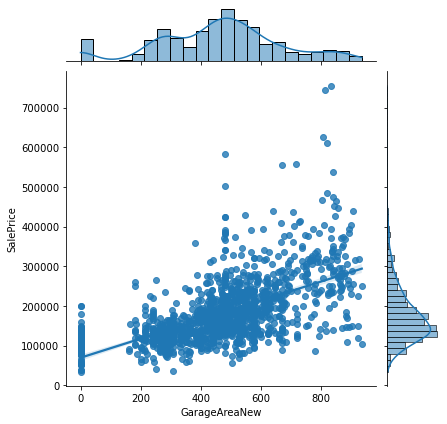

In [44]:
sns.jointplot(x= "GarageAreaNew", y= "SalePrice", kind= "reg", data = cleaned_data)

### SalePrice is Linear with GrLivArea

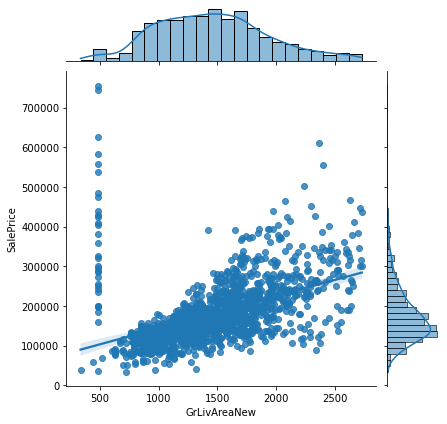

In [45]:
sns.jointplot(x= "GrLivAreaNew", y= "SalePrice", kind= "reg", data = cleaned_data)

### SalePrice is Linear with YearBuilt

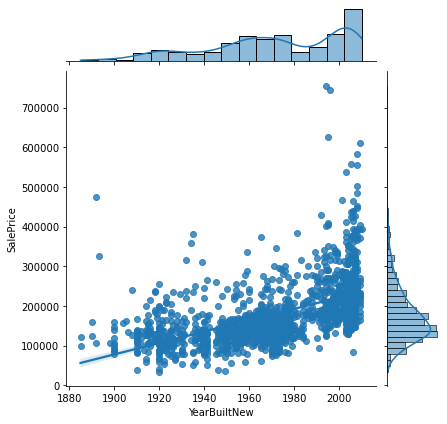

In [46]:
sns.jointplot(x= "YearBuiltNew", y= "SalePrice", kind= "reg", data = cleaned_data)

### SalePrice is Non-Linear with YrSold

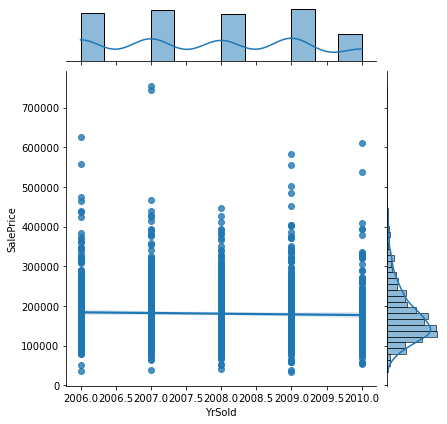

In [47]:
sns.jointplot(x= "YrSold", y= "SalePrice", kind= "reg", data = cleaned_data)

### "we will not consider Yrsold data since its is less corelated with salesprice and it is not linear"

In [48]:
reduced_data1=cleaned_data.drop(['YrSold'],axis=1)

In [49]:
reduced_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   SalePrice      1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   GrLivArea      1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   LotShape       1460 non-null   object 
 7   RoofStyle      1460 non-null   object 
 8   RoofMatl       1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  GarageType     1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  SaleCondition  1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  Heating        1460 non-null   object 
 18  Electric

# Analysing Categorical data with highest corelating continious variable

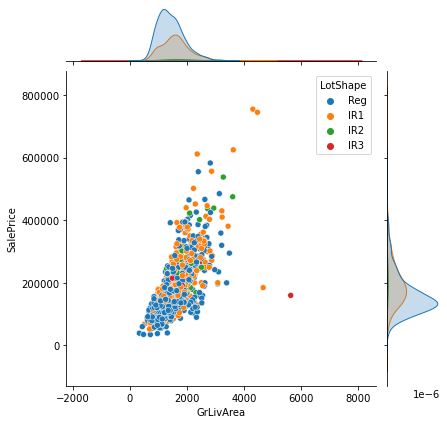

In [50]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='LotShape' ,data = cleaned_data)

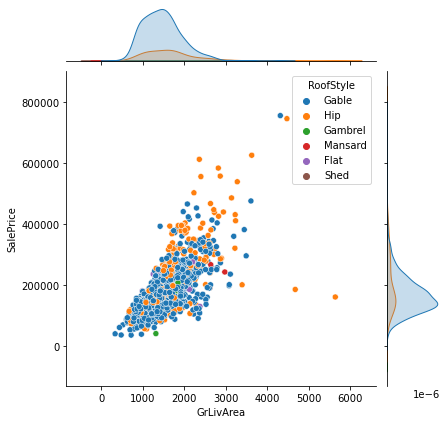

In [51]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='RoofStyle' ,data = cleaned_data)

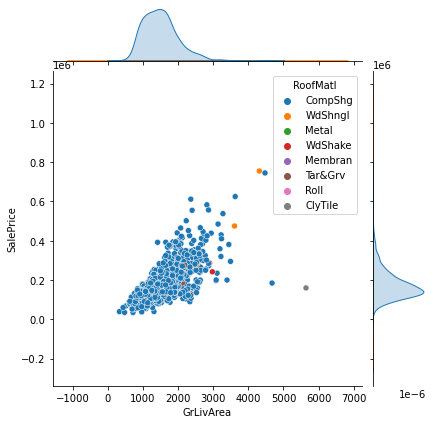

In [52]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='RoofMatl' ,data = cleaned_data)

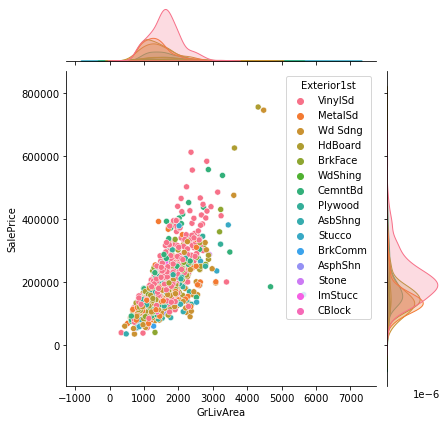

In [53]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='Exterior1st' ,data = cleaned_data)

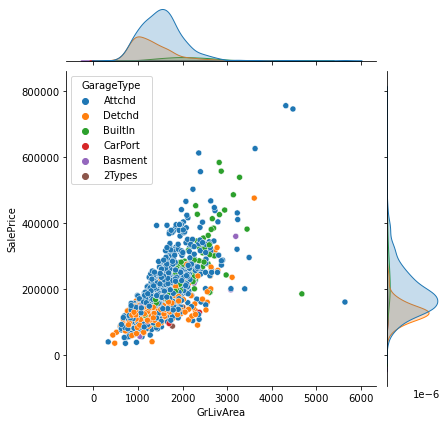

In [54]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='GarageType' ,data = cleaned_data)

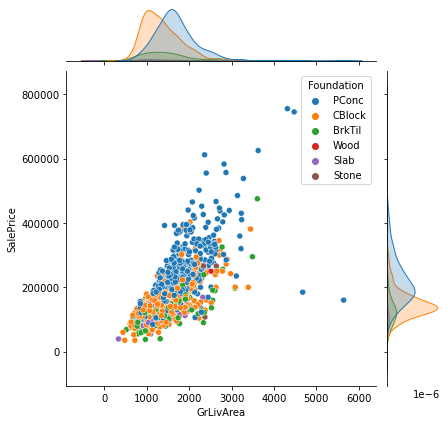

In [55]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='Foundation' ,data = cleaned_data)

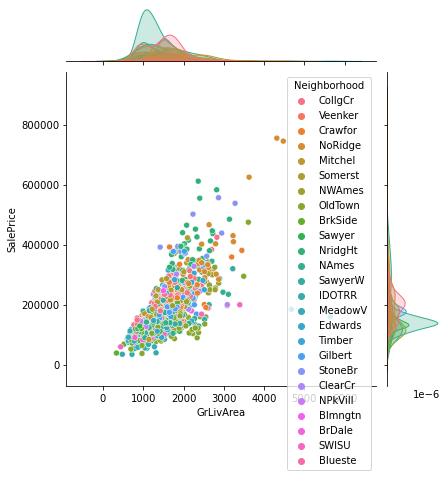

In [56]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='Neighborhood' ,data = cleaned_data)

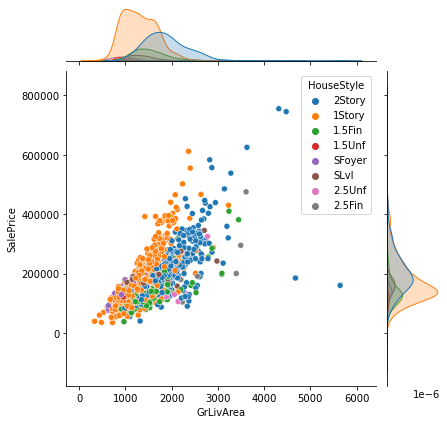

In [57]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='HouseStyle' ,data = cleaned_data)

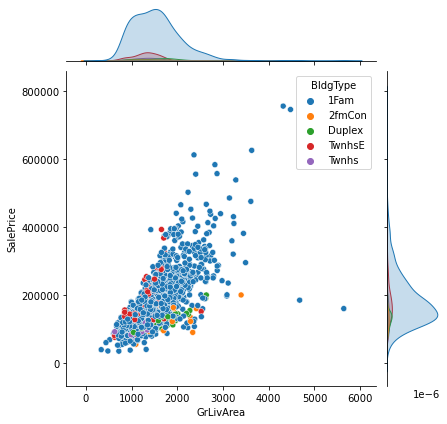

In [58]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='BldgType' ,data = cleaned_data)

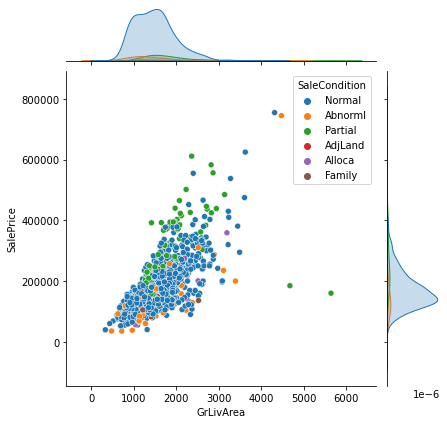

In [59]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='SaleCondition' ,data = cleaned_data)

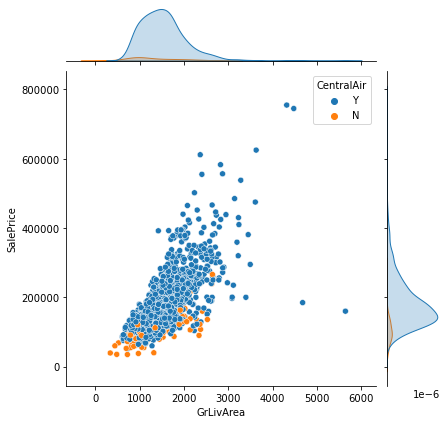

In [60]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='CentralAir' ,data = cleaned_data)

### "since there are only two categories we can perform 'Independency-Test' and if mean of two categories are same then we can say its not caterogical anymore and no point of using it hence we can drop the variable"

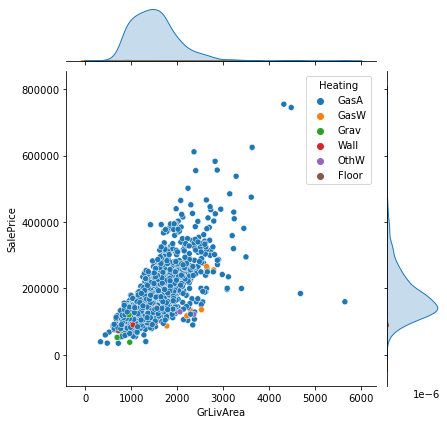

In [61]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='Heating' ,data = cleaned_data)

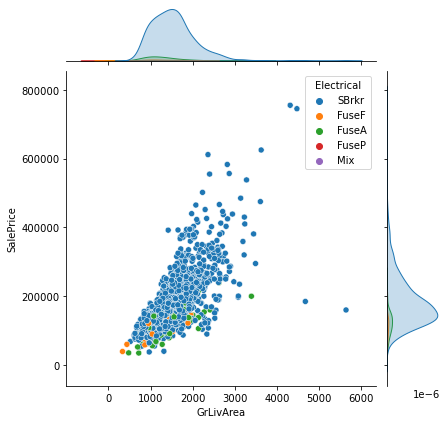

In [62]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='Electrical' ,data = cleaned_data)

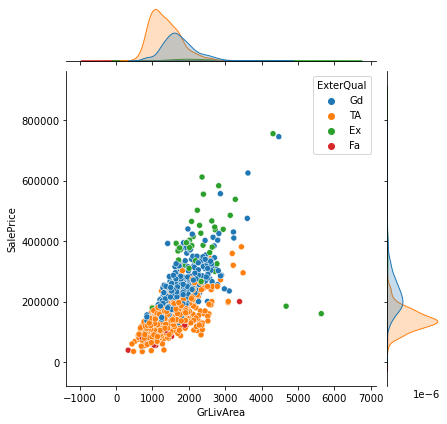

In [63]:
sns.jointplot(x= "GrLivArea", y= "SalePrice", kind= "scatter",hue='ExterQual' ,data = cleaned_data)

# Independency Test

#### Ho:mue(salesprice_centralair)=mue(salesprice_no_centralair)
#### Ha:mue(salesprice_centralair)!=mue(salesprice_no_centralair)

In [64]:
reduced_data1.head()

,Id,SalePrice,LotArea,GarageArea,GrLivArea,YearBuilt,LotShape,RoofStyle,RoofMatl,Exterior1st,...,BldgType,SaleCondition,CentralAir,Heating,Electrical,ExterQual,LotAreaNew,GarageAreaNew,GrLivAreaNew,YearBuiltNew
0,1,208500,8450,548,1710,2003,Reg,Gable,CompShg,VinylSd,...,1Fam,Normal,Y,GasA,SBrkr,Gd,8450.0,548.0,1710.0,2003
1,2,181500,9600,460,1262,1976,Reg,Gable,CompShg,MetalSd,...,1Fam,Normal,Y,GasA,SBrkr,TA,9600.0,460.0,1262.0,1976
2,3,223500,11250,608,1786,2001,IR1,Gable,CompShg,VinylSd,...,1Fam,Normal,Y,GasA,SBrkr,Gd,11250.0,608.0,1786.0,2001
3,4,140000,9550,642,1717,1915,IR1,Gable,CompShg,Wd Sdng,...,1Fam,Abnorml,Y,GasA,SBrkr,TA,9550.0,642.0,1717.0,1915
4,5,250000,14260,836,2198,2000,IR1,Gable,CompShg,VinylSd,...,1Fam,Normal,Y,GasA,SBrkr,Gd,14260.0,836.0,2198.0,2000


In [65]:
CentralAir_true=reduced_data1.SalePrice[reduced_data1.CentralAir=='Y']
CentralAir_false=reduced_data1.SalePrice[reduced_data1.CentralAir=='N']

In [66]:
indepen=ttest_ind(CentralAir_true,CentralAir_false)
print(indepen)

Ttest_indResult(statistic=9.914905121389344, pvalue=1.8095061559266025e-22)


### "Hence we reject the null hypothesys and hence we consider the column central_air as its means are diff and it becomes categorical"

# ANOVA and TUKEY

In [67]:
reduced_data2=reduced_data1[::]

In [68]:
reduced_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   SalePrice      1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   GrLivArea      1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   LotShape       1460 non-null   object 
 7   RoofStyle      1460 non-null   object 
 8   RoofMatl       1460 non-null   object 
 9   Exterior1st    1460 non-null   object 
 10  GarageType     1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  SaleCondition  1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  Heating        1460 non-null   object 
 18  Electric

### Lotshape

In [69]:
mod=ols('SalePrice~ LotShape',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

              df        sum_sq       mean_sq          F        PR(>F)
LotShape     3.0  7.032607e+11  2.344202e+11  40.132852  6.447524e-25
Residual  1456.0  8.504651e+12  5.841106e+09        NaN           NaN


In [70]:
tukey_LotShape=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.LotShape,alpha=0.05)
print(tukey_LotShape)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
   IR1    IR2  33731.7006  0.034    1758.6795  65704.7217   True
   IR1    IR3   9934.8347 0.9772  -52865.1337  72734.8031  False
   IR1    Reg -41346.8469    0.0  -52374.4362 -30319.2577   True
   IR2    IR3 -23796.8659 0.8138  -93125.3639  45531.6322  False
   IR2    Reg -75078.5475    0.0  -106450.706  -43706.389   True
   IR3    Reg -51281.6816 0.1502 -113777.8758  11214.5125  False
----------------------------------------------------------------


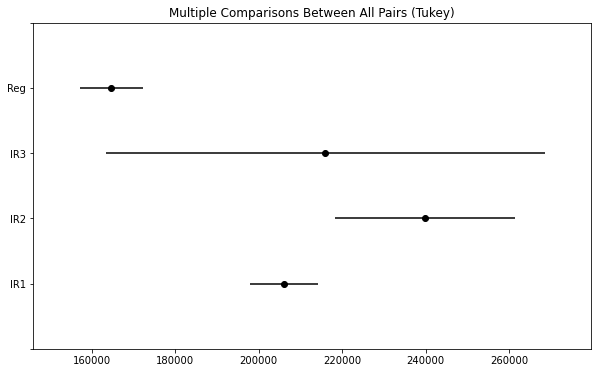

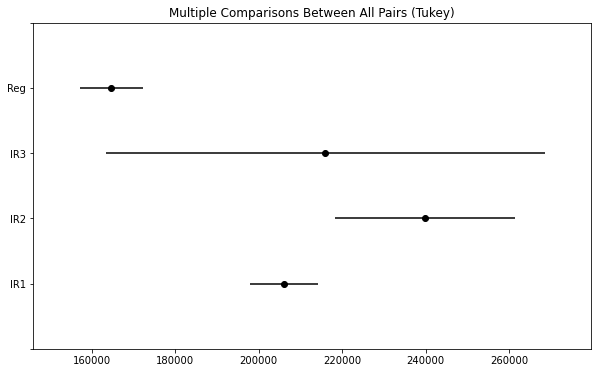

In [71]:
tukey_LotShape.plot_simultaneous()

In [72]:
reduced_data2['LotShape']=reduced_data2['LotShape'].replace('IR3','IR1')

In [73]:
reduced_data2.LotShape.value_counts()

Reg    925
IR1    494
IR2     41
Name: LotShape, dtype: int64

### RoofStyle

In [74]:
mod=ols('SalePrice~ RoofStyle',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

               df        sum_sq       mean_sq          F        PR(>F)
RoofStyle     5.0  5.312655e+11  1.062531e+11  17.805497  3.653523e-17
Residual   1454.0  8.676646e+12  5.967432e+09        NaN           NaN


In [75]:
tukey_RoofStyle=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.RoofStyle,alpha=0.05)
print(tukey_RoofStyle)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
   Flat   Gable -23206.0438 0.8906  -84690.1137  38278.0261  False
   Flat Gambrel -45780.9091 0.6983 -136085.9105  44524.0923  False
   Flat     Hip  24186.9336 0.8798   -38323.873  86697.7402  False
   Flat Mansard -14121.5714 0.9988 -117461.5824  89218.4395  False
   Flat    Shed     30310.0 0.9955 -137119.9536 197739.9536  False
  Gable Gambrel -22574.8653  0.929  -89357.1505    44207.42  False
  Gable     Hip  47392.9774   -0.0   32816.2393  61969.7154   True
  Gable Mansard   9084.4724 0.9996  -74486.0859  92655.0306  False
  Gable    Shed  53516.0438 0.9247 -102489.3078 209521.3954  False
Gambrel     Hip  69967.8427 0.0382    2239.0916 137696.5937   True
Gambrel Mansard  31659.3377 0.9584   -74918.055 138236.7303  False
Gambrel    Shed  76090.9091 0.7953  -93356.3457 245538.1639  F

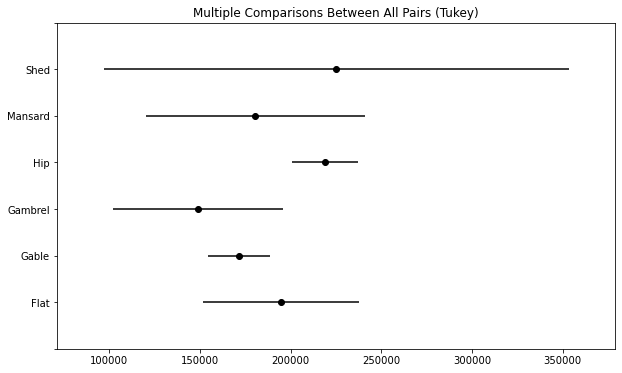

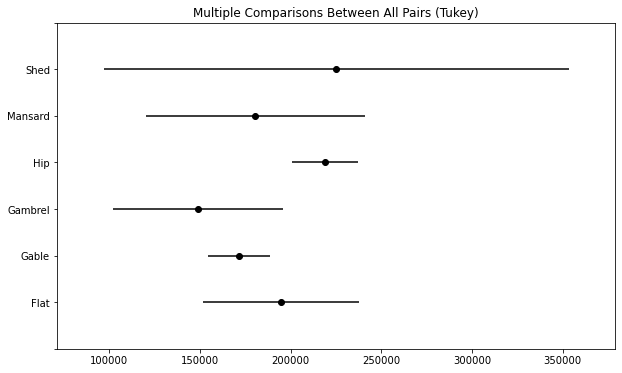

In [76]:
tukey_RoofStyle.plot_simultaneous()

In [77]:
reduced_data2['RoofStyle']=reduced_data2['RoofStyle'].replace('Flat','Gable')
reduced_data2.RoofStyle.value_counts()

Gable      1154
Hip         286
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [78]:
reduced_data2['RoofStyle']=reduced_data2['RoofStyle'].replace('Gambrel','Gable')
reduced_data2.RoofStyle.value_counts()

Gable      1165
Hip         286
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [79]:
reduced_data2['RoofStyle']=reduced_data2['RoofStyle'].replace('Mansard','Gable')
reduced_data2.RoofStyle.value_counts()

Gable    1172
Hip       286
Shed        2
Name: RoofStyle, dtype: int64

In [80]:
reduced_data2['RoofStyle']=reduced_data2['RoofStyle'].replace('Shed','Hip')
reduced_data2.RoofStyle.value_counts()

Gable    1172
Hip       288
Name: RoofStyle, dtype: int64

## Roof Matl

In [81]:
mod=ols('SalePrice~ RoofMatl',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

              df        sum_sq       mean_sq         F        PR(>F)
RoofMatl     7.0  2.892493e+11  4.132132e+10  6.727305  7.231445e-08
Residual  1452.0  8.918662e+12  6.142329e+09       NaN           NaN


In [82]:
tukey_RoofMatl=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.RoofMatl,alpha=0.05)
print(tukey_RoofMatl)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
ClyTile CompShg  19803.6792    1.0 -218166.8094 257774.1678  False
ClyTile Membran     81500.0 0.9959 -254923.8103 417923.8103  False
ClyTile   Metal     20000.0    1.0 -316423.8103 356423.8103  False
ClyTile    Roll    -23000.0    1.0 -359423.8103 313423.8103  False
ClyTile Tar&Grv  25406.3636    1.0 -223059.0868 273871.8141  False
ClyTile WdShake     81400.0 0.9812 -179192.7629 341992.7629  False
ClyTile WdShngl    230250.0 0.1174  -26697.9294 487197.9294  False
CompShg Membran  61696.3208 0.9938 -176274.1678 299666.8094  False
CompShg   Metal    196.3208    1.0 -237774.1678 238166.8094  False
CompShg    Roll -42803.6792 0.9994 -280774.1678 195166.8094  False
CompShg Tar&Grv   5602.6844    1.0  -66397.6863  77603.0552  False
CompShg WdShake  61596.3208 0.6512  -44975.5395  168168.181  F

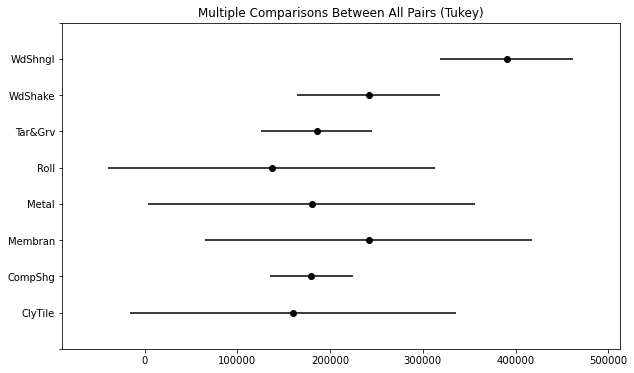

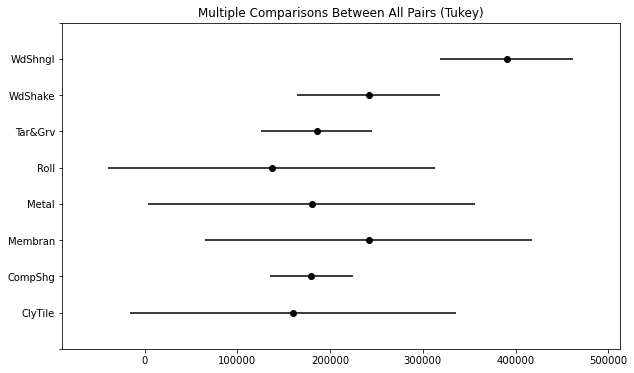

In [83]:
tukey_RoofMatl.plot_simultaneous()

In [84]:
reduced_data2['RoofMatl']=reduced_data2['RoofMatl'].replace('ClyTile','CompShg')
reduced_data2.RoofMatl.value_counts()

CompShg    1435
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [85]:
reduced_data2['RoofMatl']=reduced_data2['RoofMatl'].replace('Metal','CompShg')
reduced_data2.RoofMatl.value_counts()

CompShg    1436
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [86]:
reduced_data2['RoofMatl']=reduced_data2['RoofMatl'].replace('Tar&Grv','CompShg')
reduced_data2.RoofMatl.value_counts()

CompShg    1447
WdShngl       6
WdShake       5
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [87]:
reduced_data2['RoofMatl']=reduced_data2['RoofMatl'].replace('Membran','WdShake')
reduced_data2.RoofMatl.value_counts() 

CompShg    1447
WdShngl       6
WdShake       6
Roll          1
Name: RoofMatl, dtype: int64

### Exterior1st

In [88]:
mod=ols('SalePrice~ Exterior1st',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
Exterior1st    14.0  1.406721e+12  1.004801e+11  18.611743  2.586089e-43
Residual     1445.0  7.801190e+12  5.398747e+09        NaN           NaN


In [89]:
tukey_Exterior1st=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.Exterior1st,alpha=0.05)
print(tukey_Exterior1st)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
AsbShng AsphShn     -7385.55    1.0 -263161.8534 248390.7534  False
AsbShng BrkComm    -36385.55    1.0 -221502.8476 148731.7476  False
AsbShng BrkFace     87187.45 0.0008   21146.2924 153228.6076   True
AsbShng  CBlock     -2385.55    1.0 -258161.8534 253390.7534  False
AsbShng CemntBd  124305.1057    0.0   59987.7396 188622.4718   True
AsbShng HdBoard   55691.9005 0.0789   -2583.0422 113966.8431  False
AsbShng ImStucc    154614.45 0.7654 -101161.8534 410390.7534  False
AsbShng MetalSd   42036.6273  0.478  -16260.2027 100333.4572  False
AsbShng Plywood   68556.8296 0.0112    7793.1919 129320.4674   True
AsbShng   Stone    151114.45 0.2626  -34002.8476 336231.7476  False
AsbShng  Stucco     55604.45 0.4247  -19279.1839 130488.0839  False
AsbShng VinylSd   106347.351    0.0   49458.9226

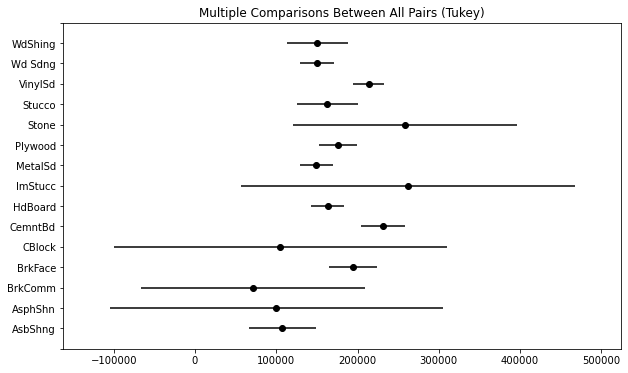

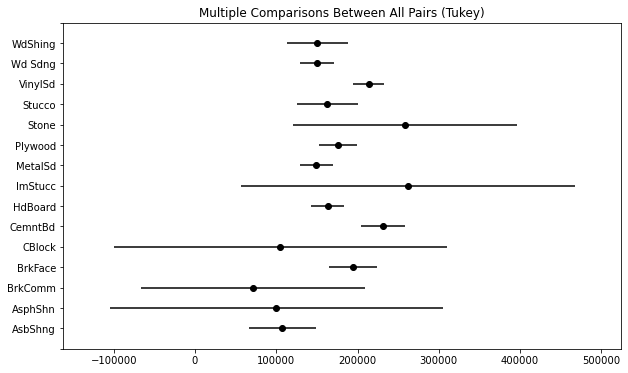

In [90]:
tukey_Exterior1st.plot_simultaneous()

In [91]:
reduced_data2.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [92]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('AsphShn','AsbShng')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     21
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [93]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('CBlock','AsbShng')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     22
BrkComm      2
Stone        2
ImStucc      1
Name: Exterior1st, dtype: int64

In [94]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('WdShing','Wd Sdng')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
Wd Sdng    232
HdBoard    222
MetalSd    220
Plywood    108
CemntBd     61
BrkFace     50
Stucco      25
AsbShng     22
BrkComm      2
Stone        2
ImStucc      1
Name: Exterior1st, dtype: int64

In [95]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('ImStucc','Stone')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
Wd Sdng    232
HdBoard    222
MetalSd    220
Plywood    108
CemntBd     61
BrkFace     50
Stucco      25
AsbShng     22
Stone        3
BrkComm      2
Name: Exterior1st, dtype: int64

In [96]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('Plywood','HdBoard')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
HdBoard    330
Wd Sdng    232
MetalSd    220
CemntBd     61
BrkFace     50
Stucco      25
AsbShng     22
Stone        3
BrkComm      2
Name: Exterior1st, dtype: int64

In [97]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('Stucco','HdBoard')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
HdBoard    355
Wd Sdng    232
MetalSd    220
CemntBd     61
BrkFace     50
AsbShng     22
Stone        3
BrkComm      2
Name: Exterior1st, dtype: int64

In [98]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('CemntBd','Vinylsd')
reduced_data2.Exterior1st.value_counts()

VinylSd    515
HdBoard    355
Wd Sdng    232
MetalSd    220
Vinylsd     61
BrkFace     50
AsbShng     22
Stone        3
BrkComm      2
Name: Exterior1st, dtype: int64

In [99]:
reduced_data2['Exterior1st']=reduced_data2['Exterior1st'].replace('Vinylsd','VinylSd')
reduced_data2.Exterior1st.value_counts()

VinylSd    576
HdBoard    355
Wd Sdng    232
MetalSd    220
BrkFace     50
AsbShng     22
Stone        3
BrkComm      2
Name: Exterior1st, dtype: int64

### GarageType

In [100]:
mod=ols('SalePrice~ GarageType',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                df        sum_sq       mean_sq          F        PR(>F)
GarageType     5.0  1.559921e+12  3.119841e+11  59.312957  2.578443e-56
Residual    1454.0  7.647991e+12  5.259966e+09        NaN           NaN


In [101]:
tukey_GarageType=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.GarageType,alpha=0.05)
print(tukey_GarageType)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------
 2Types  Attchd   43128.1399 0.6949  -41626.2153  127882.495  False
 2Types Basment    9287.3509 0.9998  -87627.3183   106202.02  False
 2Types BuiltIn  103468.4053 0.0096   16147.3643 190789.4463   True
 2Types CarPort  -41321.2222  0.889 -150395.0837  67752.6392  False
 2Types  Detchd  -17192.1705 0.9926 -102332.8489  67948.5079  False
 Attchd Basment   -33840.789 0.3348  -81791.0248  14109.4468  False
 Attchd BuiltIn   60340.2655    0.0   37280.8593  83399.6716   True
 Attchd CarPort  -84449.3621 0.0069 -153759.3849 -15139.3392   True
 Attchd  Detchd  -60320.3104   -0.0  -72798.5768  -47842.044   True
Basment BuiltIn   94181.0544    0.0    41827.558 146534.5508   True
Basment CarPort  -50608.5731 0.5157 -134352.4185  33135.2723  False
Basment  Detchd  -26479.5214 0.6293  -75109.3426

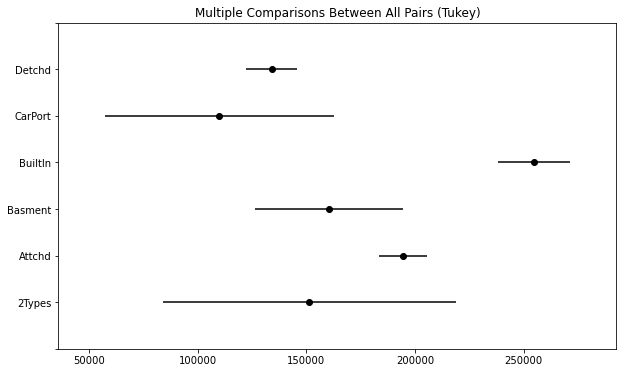

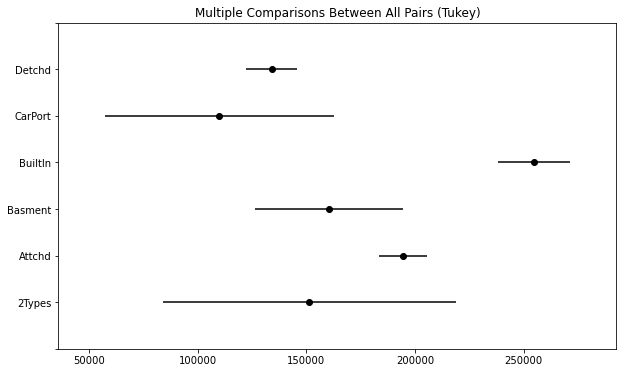

In [102]:
tukey_GarageType.plot_simultaneous()

In [103]:
reduced_data2.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [104]:
reduced_data2['GarageType']=reduced_data2['GarageType'].replace('2Types','Basment')
reduced_data2.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     25
CarPort      9
Name: GarageType, dtype: int64

###  Foundation

In [105]:
mod=ols('SalePrice~ Foundation',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                df        sum_sq       mean_sq           F        PR(>F)
Foundation     5.0  2.360618e+12  4.721235e+11  100.253851  5.791895e-91
Residual    1454.0  6.847294e+12  4.709280e+09         NaN           NaN


In [106]:
tukey_Foundation=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.Foundation,alpha=0.05)
print(tukey_Foundation)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
BrkTil CBlock  17514.6392 0.0612    -460.9855  35490.2638  False
BrkTil  PConc  92939.3667   -0.0   74997.5766 110881.1568   True
BrkTil   Slab -24925.4503  0.566  -68057.5062  18206.6055  False
BrkTil  Stone  33668.0913 0.8475    -47901.35 115237.5327  False
BrkTil   Wood  53375.5913 0.7663  -60836.9582 167588.1408  False
CBlock  PConc  75424.7275   -0.0   64481.7491  86367.7059   True
CBlock   Slab -42440.0895 0.0353  -83161.2779  -1718.9011   True
CBlock  Stone  16153.4522 0.9927   -64167.247  96474.1513  False
CBlock   Wood  35860.9522 0.9458  -77463.1291 149185.0335  False
 PConc   Slab -117864.817   -0.0 -158571.0811 -77158.5529   True
 PConc  Stone -59271.2754 0.2847 -139584.4092  21041.8584  False
 PConc   Wood -39563.7754 0.9192 -152882.4947   73754.944  False
  Slab  Stone  58593.5417

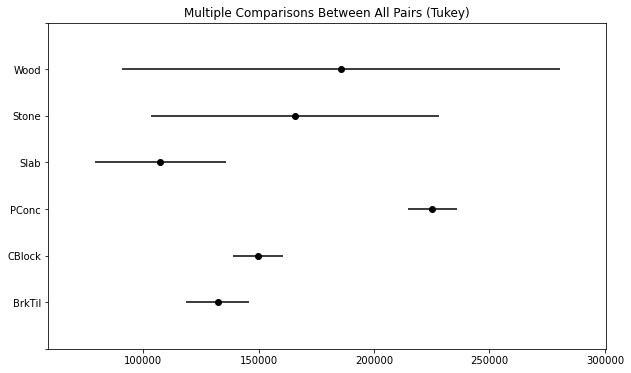

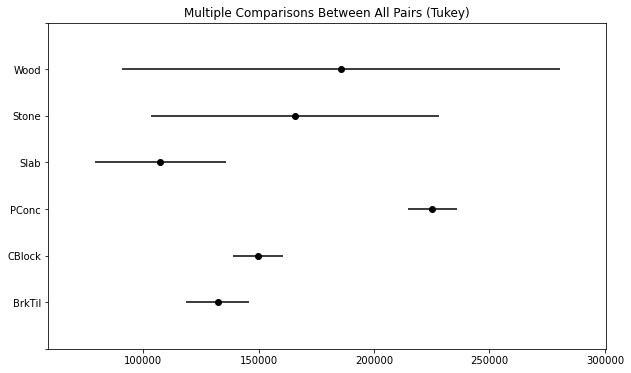

In [107]:
tukey_Foundation.plot_simultaneous()

In [108]:
reduced_data2['Foundation']=reduced_data2['Foundation'].replace('Stone','Wood')
reduced_data2.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Wood        9
Name: Foundation, dtype: int64

In [109]:
reduced_data2['Foundation']=reduced_data2['Foundation'].replace('Wood','CBlock')
reduced_data2.Foundation.value_counts()

PConc     647
CBlock    643
BrkTil    146
Slab       24
Name: Foundation, dtype: int64

### Neighborhood

In [110]:
mod=ols('SalePrice~ Neighborhood',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                  df        sum_sq       mean_sq          F         PR(>F)
Neighborhood    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual      1435.0  4.184305e+12  2.915892e+09        NaN            NaN


In [111]:
tukey_Neighborhood=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.Neighborhood,alpha=0.05)
print(tukey_Neighborhood)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
Blmngtn Blueste  -57370.8824 0.9996 -205322.0065   90580.2418  False
Blmngtn  BrDale  -90377.1324 0.0005 -159314.3015  -21439.9632   True
Blmngtn BrkSide  -70036.8306 0.0008 -124621.8038  -15451.8574   True
Blmngtn ClearCr   17694.5462    1.0   -43158.694   78547.7864  False
Blmngtn CollgCr     3094.891    1.0  -47553.8988   53743.6808  False
Blmngtn Crawfor   15753.8431    1.0  -39673.7263   71181.4126  False
Blmngtn Edwards  -66651.1824 0.0008 -118572.9414  -14729.4233   True
Blmngtn Gilbert    -2016.376    1.0   -54931.344   50898.5919  False
Blmngtn  IDOTRR  -94747.0986    0.0 -152737.0152  -36757.1819   True
Blmngtn MeadowV  -96294.4118 0.0001 -164179.0432  -28409.7803   True
Blmngtn Mitchel  -38600.7599 0.6655  -94310.4053   17108.8855  False
Blmngtn   NAmes  -49023.8024   0.0

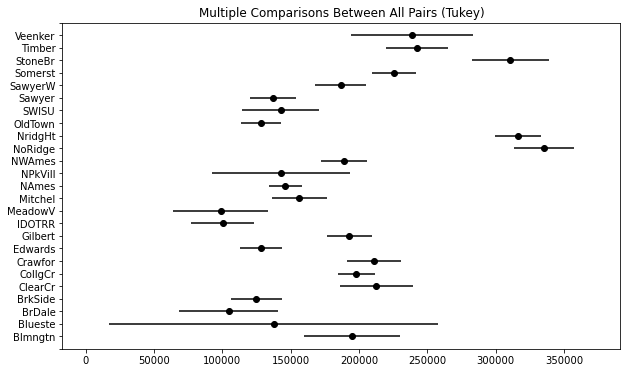

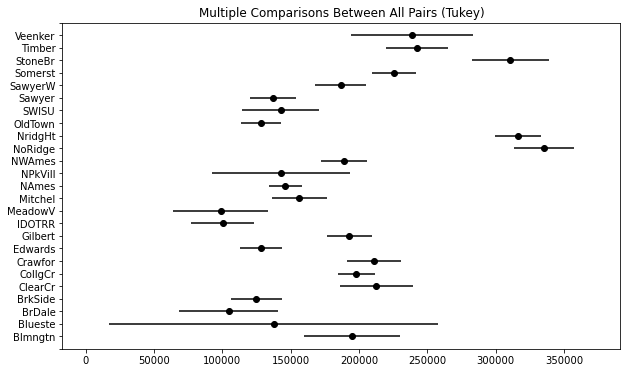

In [112]:
tukey_Neighborhood.plot_simultaneous()

In [113]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Veenker','Timber')
reduced_data2.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Timber      49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [114]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('SWISU','Sawyer')
reduced_data2.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Sawyer      99
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Timber      49
Mitchel     49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [115]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Sawyer','OldTown')
reduced_data2.Neighborhood.value_counts()

NAmes      225
OldTown    212
CollgCr    150
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Timber      49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [116]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('NPkVill','NAmes')
reduced_data2.Neighborhood.value_counts()

NAmes      234
OldTown    212
CollgCr    150
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Timber      49
Mitchel     49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Blueste      2
Name: Neighborhood, dtype: int64

In [117]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Mitchel','NAmes')
reduced_data2.Neighborhood.value_counts()

NAmes      283
OldTown    212
CollgCr    150
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Timber      49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Blueste      2
Name: Neighborhood, dtype: int64

In [118]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Blueste','Blmngtn')
reduced_data2.Neighborhood.value_counts()

NAmes      283
OldTown    212
CollgCr    150
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Timber      49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
Blmngtn     19
MeadowV     17
BrDale      16
Name: Neighborhood, dtype: int64

In [119]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Blmngtn','CollgCr')
reduced_data2.Neighborhood.value_counts()

NAmes      283
OldTown    212
CollgCr    169
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Timber      49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
MeadowV     17
BrDale      16
Name: Neighborhood, dtype: int64

In [120]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Crawfor','CollgCr')
reduced_data2.Neighborhood.value_counts()

NAmes      283
CollgCr    220
OldTown    212
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Timber      49
NoRidge     41
IDOTRR      37
ClearCr     28
StoneBr     25
MeadowV     17
BrDale      16
Name: Neighborhood, dtype: int64

In [121]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('ClearCr','CollgCr')
reduced_data2.Neighborhood.value_counts()

NAmes      283
CollgCr    248
OldTown    212
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
Timber      49
NoRidge     41
IDOTRR      37
StoneBr     25
MeadowV     17
BrDale      16
Name: Neighborhood, dtype: int64

In [122]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('MeadowV','IDOTRR')
reduced_data2.Neighborhood.value_counts()

NAmes      283
CollgCr    248
OldTown    212
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
IDOTRR      54
Timber      49
NoRidge     41
StoneBr     25
BrDale      16
Name: Neighborhood, dtype: int64

In [123]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('Gilbert','CollgCr')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    100
Somerst     86
NridgHt     77
NWAmes      73
SawyerW     59
BrkSide     58
IDOTRR      54
Timber      49
NoRidge     41
StoneBr     25
BrDale      16
Name: Neighborhood, dtype: int64

In [124]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('BrDale','IDOTRR')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    100
Somerst     86
NridgHt     77
NWAmes      73
IDOTRR      70
SawyerW     59
BrkSide     58
Timber      49
NoRidge     41
StoneBr     25
Name: Neighborhood, dtype: int64

In [125]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('BrkSide','Edwards')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    158
Somerst     86
NridgHt     77
NWAmes      73
IDOTRR      70
SawyerW     59
Timber      49
NoRidge     41
StoneBr     25
Name: Neighborhood, dtype: int64

In [126]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('NoRidge','NridgHt')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    158
NridgHt    118
Somerst     86
NWAmes      73
IDOTRR      70
SawyerW     59
Timber      49
StoneBr     25
Name: Neighborhood, dtype: int64

In [127]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('SawyerW','NWAmes')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    158
NWAmes     132
NridgHt    118
Somerst     86
IDOTRR      70
Timber      49
StoneBr     25
Name: Neighborhood, dtype: int64

In [128]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('StoneBr','NridgHt')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    158
NridgHt    143
NWAmes     132
Somerst     86
IDOTRR      70
Timber      49
Name: Neighborhood, dtype: int64

In [129]:
reduced_data2['Neighborhood']=reduced_data2['Neighborhood'].replace('NridgHT','NridgHt')
reduced_data2.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    158
NridgHt    143
NWAmes     132
Somerst     86
IDOTRR      70
Timber      49
Name: Neighborhood, dtype: int64

### HouseStyle

In [130]:
mod=ols('SalePrice~ HouseStyle',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                df        sum_sq       mean_sq          F        PR(>F)
HouseStyle     7.0  7.947590e+11  1.135370e+11  19.595001  3.376777e-25
Residual    1452.0  8.413152e+12  5.794182e+09        NaN           NaN


In [131]:
tukey_HouseStyle=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.HouseStyle,alpha=0.05)
print(tukey_HouseStyle)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
1.5Fin 1.5Unf -32966.7403  0.779  -97462.5517  31529.0712  False
1.5Fin 1Story  32868.7377    0.0   12370.6232  53366.8522   True
1.5Fin 2.5Fin  76883.2597 0.0994    -6899.257 160665.7765  False
1.5Fin 2.5Unf  14237.8052 0.9989  -57870.7041  86346.3145  False
1.5Fin 2Story  66935.0238    0.0   45334.0021  88536.0455   True
1.5Fin SFoyer  -8042.2538 0.9991  -50343.8455   34259.338  False
1.5Fin   SLvl  23586.6444 0.4186  -10588.1781  57761.4668  False
1.5Unf 1Story   65835.478 0.0299    3492.8967 128178.0593   True
1.5Unf 2.5Fin    109850.0 0.0255    7449.1462 212250.8538   True
1.5Unf 2.5Unf  47204.5455 0.7861  -45887.1398 140296.2307  False
1.5Unf 2Story   99901.764    0.0   37187.8989 162615.6292   True
1.5Unf SFoyer  24924.4865 0.9677  -47572.7508  97421.7238  False
1.5Unf   SLvl  56553.3846

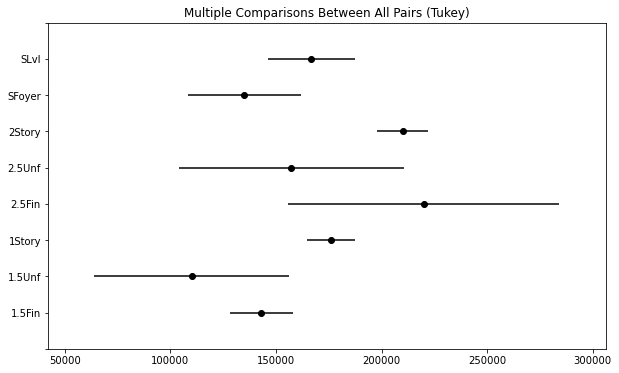

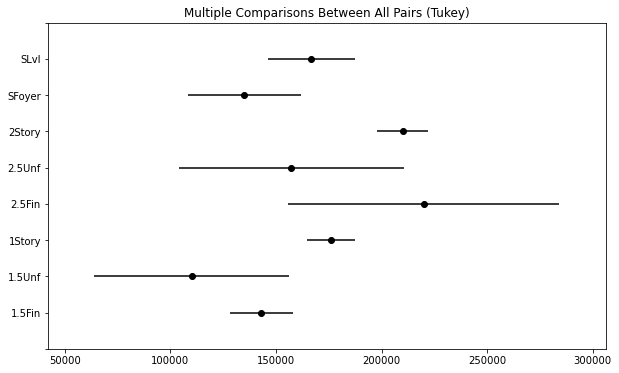

In [132]:
tukey_HouseStyle.plot_simultaneous()

In [133]:
reduced_data2.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [134]:
reduced_data2['HouseStyle']=reduced_data2['HouseStyle'].replace('1.5Unf','1.5Fin')
reduced_data2.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    168
SLvl       65
SFoyer     37
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [135]:
reduced_data2['HouseStyle']=reduced_data2['HouseStyle'].replace('2.5Unf','1.5Fin')
reduced_data2.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    179
SLvl       65
SFoyer     37
2.5Fin      8
Name: HouseStyle, dtype: int64

In [136]:
reduced_data2['HouseStyle']=reduced_data2['HouseStyle'].replace('2.5Fin','2Story')
reduced_data2.HouseStyle.value_counts()

1Story    726
2Story    453
1.5Fin    179
SLvl       65
SFoyer     37
Name: HouseStyle, dtype: int64

In [137]:
reduced_data2['HouseStyle']=reduced_data2['HouseStyle'].replace('SLvl','Slvl')
reduced_data2.HouseStyle.value_counts()

1Story    726
2Story    453
1.5Fin    179
Slvl       65
SFoyer     37
Name: HouseStyle, dtype: int64

### BldgType

In [138]:
mod=ols('SalePrice~ BldgType',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

              df        sum_sq       mean_sq          F        PR(>F)
BldgType     4.0  3.179863e+11  7.949656e+10  13.011077  2.056736e-10
Residual  1455.0  8.889925e+12  6.109914e+09        NaN           NaN


In [139]:
tukey_BldgType=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.BldgType,alpha=0.05)
print(tukey_BldgType)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
  1Fam 2fmCon -57331.5493 0.0006  -96159.006 -18504.0926   True
  1Fam Duplex -52222.7305    0.0 -82452.3736 -21993.0873   True
  1Fam  Twnhs -49852.1795 0.0004 -82977.3852 -16726.9738   True
  1Fam TwnhsE  -3804.4653 0.9877 -24712.6643  17103.7338  False
2fmCon Duplex   5108.8189 0.9985 -43333.7962  53551.4339  False
2fmCon  Twnhs   7479.3698 0.9943 -42821.0763   57779.816  False
2fmCon TwnhsE   53527.084 0.0067  10283.4901  96770.6779   True
Duplex  Twnhs    2370.551 0.9999 -41633.9352  46375.0372  False
Duplex TwnhsE  48418.2652 0.0021  12693.3671  84143.1633   True
 Twnhs TwnhsE  46047.7142  0.009   7841.4808  84253.9476   True
---------------------------------------------------------------


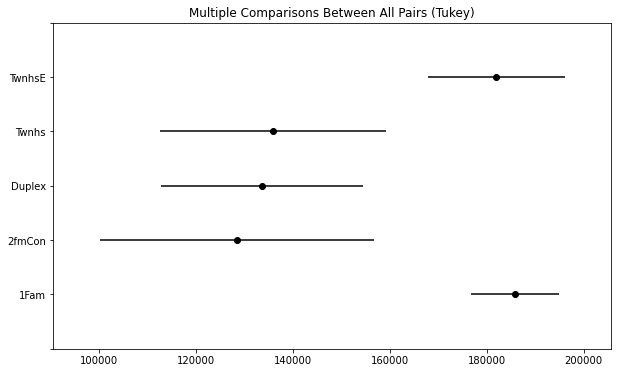

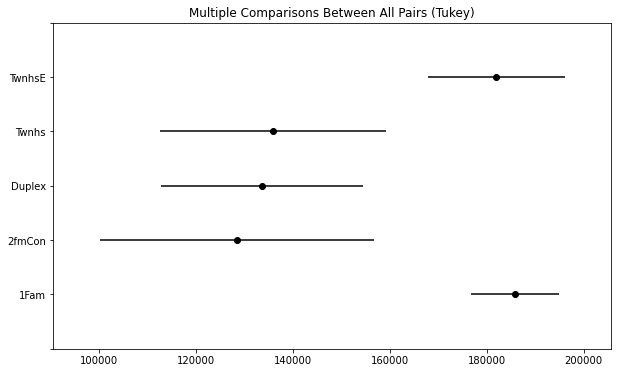

In [140]:
tukey_BldgType.plot_simultaneous()

In [141]:
reduced_data2.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [142]:
reduced_data2['BldgType']=reduced_data2['BldgType'].replace('Twnhs','Duplex')
reduced_data2.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      95
2fmCon      31
Name: BldgType, dtype: int64

In [143]:
reduced_data2['BldgType']=reduced_data2['BldgType'].replace('2fmCon','Duplex')
reduced_data2.BldgType.value_counts()

1Fam      1220
Duplex     126
TwnhsE     114
Name: BldgType, dtype: int64

### SaleCondition

In [144]:
mod=ols('SalePrice~ SaleCondition',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                   df        sum_sq       mean_sq          F        PR(>F)
SaleCondition     5.0  1.247649e+12  2.495298e+11  45.578428  7.988268e-44
Residual       1454.0  7.960263e+12  5.474734e+09        NaN           NaN


In [145]:
tukey_SaleCondition=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.SaleCondition,alpha=0.05)
print(tukey_SaleCondition)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1  group2   meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------
Abnorml AdjLand -42401.6238 0.8715 -150039.7004  65236.4529  False
Abnorml  Alloca  20850.7929 0.9407  -43618.0497  85319.6355  False
Abnorml  Family   3073.3762    1.0  -48601.4425   54748.195  False
Abnorml  Normal  28675.5958 0.0026    6799.1159  50552.0757   True
Abnorml Partial 125765.1282   -0.0   97516.2967 154013.9597   True
AdjLand  Alloca  63252.4167 0.6768  -58646.9178 185151.7511  False
AdjLand  Family     45475.0 0.8723  -70168.8627 161118.8627  False
AdjLand  Normal  71077.2195 0.3914  -34666.7942 176821.2333  False
AdjLand Partial  168166.752 0.0001   60923.0456 275410.4584   True
 Alloca  Family -17777.4167 0.9863  -94873.3251  59318.4918  False
 Alloca  Normal   7824.8029 0.9992  -53429.3609  69078.9666  False
 Alloca Partial 104914.3353    0.0   41106.1174 168722.5533   

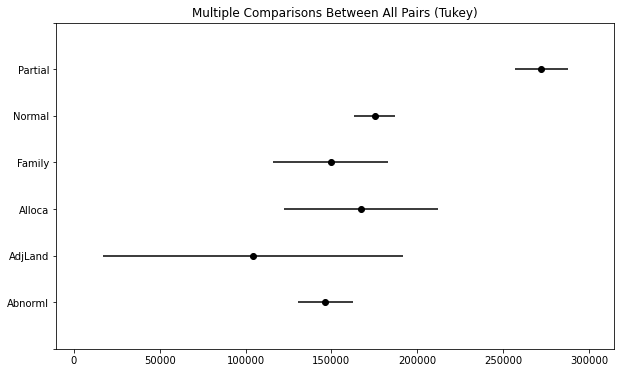

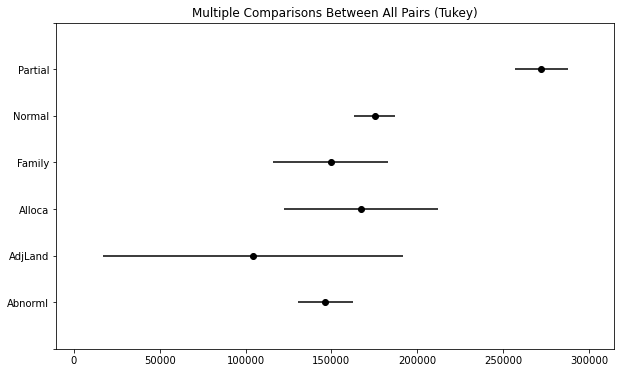

In [146]:
tukey_SaleCondition.plot_simultaneous()

In [147]:
reduced_data2['SaleCondition']=reduced_data2['SaleCondition'].replace('AdjLand','Abnorml')
reduced_data2.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     105
Family       20
Alloca       12
Name: SaleCondition, dtype: int64

In [148]:
reduced_data2['SaleCondition']=reduced_data2['SaleCondition'].replace('Alloca','Abnorml')
reduced_data2.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     117
Family       20
Name: SaleCondition, dtype: int64

In [149]:
reduced_data2['SaleCondition']=reduced_data2['SaleCondition'].replace('Family','Abnorml')
reduced_data2.SaleCondition.value_counts()

Normal     1198
Abnorml     137
Partial     125
Name: SaleCondition, dtype: int64

### Heating

In [150]:
mod=ols('SalePrice~ Heating',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
Heating      5.0  1.329359e+11  2.658717e+10  4.259819  0.000753
Residual  1454.0  9.074975e+12  6.241386e+09       NaN       NaN


In [151]:
tukey_Heating=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.Heating,alpha=0.05)
print(tukey_Heating)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
 Floor   GasA  109521.1954 0.7357 -115992.5436 335034.9344  False
 Floor   GasW   94132.1667 0.8558 -137480.0925 325744.4259  False
 Floor   Grav    2771.4286    1.0 -238228.5303 243771.3874  False
 Floor   OthW      53250.0  0.994 -222850.1385 329350.1385  False
 Floor   Wall      19600.0 0.9999 -232443.7899 271643.7899  False
  GasA   GasW  -15389.0287 0.9637   -68858.364  38080.3066  False
  GasA   Grav -106749.7668  0.005 -192164.7032 -21334.8304   True
  GasA   OthW  -56271.1954 0.9159 -215789.2748  103246.884  False
  GasA   Wall  -89921.1954 0.2057  -202796.362  22953.9713  False
  GasW   Grav  -91360.7381 0.0988 -191777.3876   9055.9114  False
  GasW   OthW  -40882.1667 0.9826   -208911.36 127147.0266  False
  GasW   Wall  -74532.1667 0.5275 -199145.9516  50081.6182  False
  Grav   O

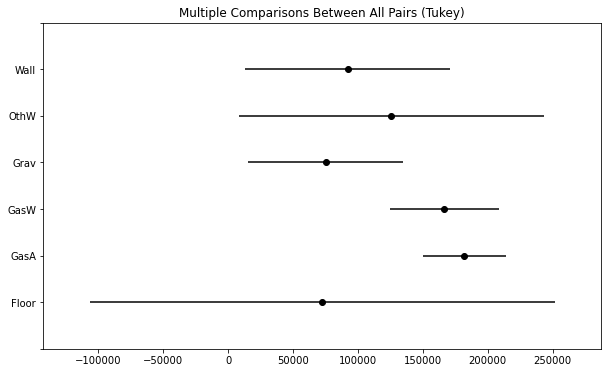

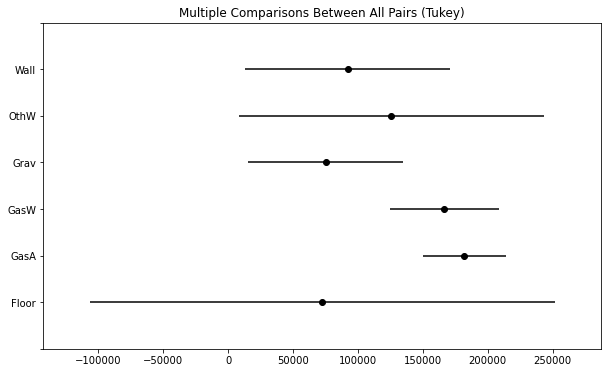

In [152]:
tukey_Heating.plot_simultaneous()

In [153]:
reduced_data2['Heating']=reduced_data2['Heating'].replace('Floor','Wall')
reduced_data2.Heating.value_counts()

GasA    1428
GasW      18
Grav       7
Wall       5
OthW       2
Name: Heating, dtype: int64

In [154]:
reduced_data2['Heating']=reduced_data2['Heating'].replace('OthW','Wall')
reduced_data2.Heating.value_counts()

GasA    1428
GasW      18
Grav       7
Wall       7
Name: Heating, dtype: int64

In [155]:
reduced_data2['Heating']=reduced_data2['Heating'].replace('Grav','Wall')
reduced_data2.Heating.value_counts()

GasA    1428
GasW      18
Wall      14
Name: Heating, dtype: int64

In [156]:
reduced_data2['Heating']=reduced_data2['Heating'].replace('GasW','GasA')
reduced_data2.Heating.value_counts()

GasA    1446
Wall      14
Name: Heating, dtype: int64

### Electrical 

In [157]:
mod=ols('SalePrice~ Electrical',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

                df        sum_sq       mean_sq          F        PR(>F)
Electrical     4.0  5.492605e+11  1.373151e+11  23.074438  1.641208e-18
Residual    1455.0  8.658651e+12  5.950963e+09        NaN           NaN


In [158]:
tukey_Electrical=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.Electrical,alpha=0.05)
print(tukey_Electrical)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 FuseA  FuseF -14521.4492 0.9106  -60525.2793   31482.381  False
 FuseA  FuseP -24863.5603  0.982 -148432.2461  98705.1256  False
 FuseA    Mix -55196.8936 0.9539  -267006.177 156612.3898  False
 FuseA  SBrkr  64613.7438   -0.0   42130.5156  87096.9721   True
 FuseF  FuseP -10342.1111 0.9995 -138564.9042  117880.682  False
 FuseF    Mix -40675.4444 0.9856 -255233.2154 173882.3265  False
 FuseF  SBrkr   79135.193    0.0   38179.6061 120090.7799   True
 FuseP    Mix -30333.3333 0.9971 -273618.9778 212952.3111  False
 FuseP  SBrkr  89477.3041 0.2632  -32302.1187  211256.727  False
   Mix  SBrkr 119810.6375 0.5283  -90959.8069 330581.0819  False
----------------------------------------------------------------


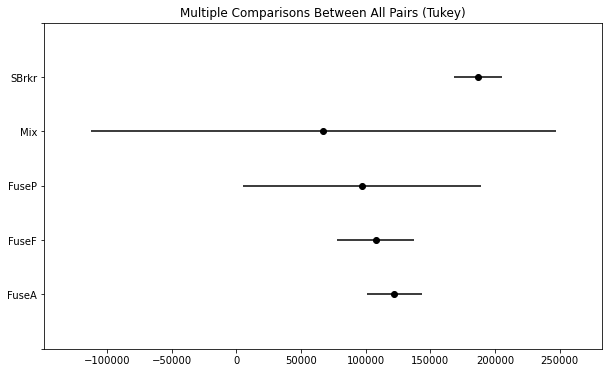

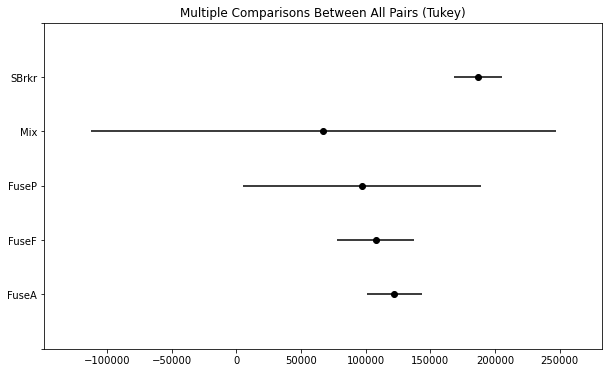

In [159]:
tukey_Electrical.plot_simultaneous()

In [160]:
reduced_data2['Electrical']=reduced_data2['Electrical'].replace('FuseP','Mix')
reduced_data2.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
Mix         4
Name: Electrical, dtype: int64

In [161]:
reduced_data2['Electrical']=reduced_data2['Electrical'].replace('FuseF','Mix')
reduced_data2.Electrical.value_counts()

SBrkr    1335
FuseA      94
Mix        31
Name: Electrical, dtype: int64

In [162]:
reduced_data2['Electrical']=reduced_data2['Electrical'].replace('Mix','FuseA')
reduced_data2.Electrical.value_counts()

SBrkr    1335
FuseA     125
Name: Electrical, dtype: int64

###  ExterQual

In [163]:
mod=ols('SalePrice~ ExterQual',data=reduced_data2).fit()
aov_table=smf.stats.anova_lm(mod,type = 2)
print(aov_table)

               df        sum_sq       mean_sq           F         PR(>F)
ExterQual     3.0  4.395744e+12  1.465248e+12  443.334831  1.439551e-204
Residual   1456.0  4.812167e+12  3.305060e+09         NaN            NaN


In [164]:
tukey_ExterQual=pairwise_tukeyhsd(reduced_data2.SalePrice,reduced_data2.ExterQual,alpha=0.05)
print(tukey_ExterQual)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -279375.7473    0.0 -323896.9633 -234854.5313   True
    Ex     Gd -135727.4513    0.0 -157297.2472 -114157.6553   True
    Ex     TA -223019.6481    0.0  -244104.848 -201934.4481   True
    Fa     Gd   143648.296    0.0  103567.2848  183729.3071   True
    Fa     TA   56356.0992 0.0016   16533.7811   96178.4172   True
    Gd     TA  -87292.1968    0.0  -95594.8733  -78989.5203   True
------------------------------------------------------------------


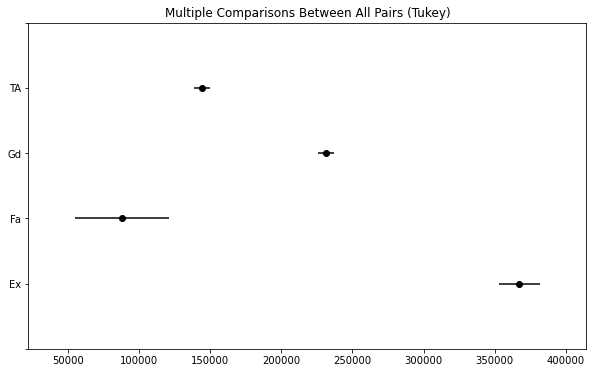

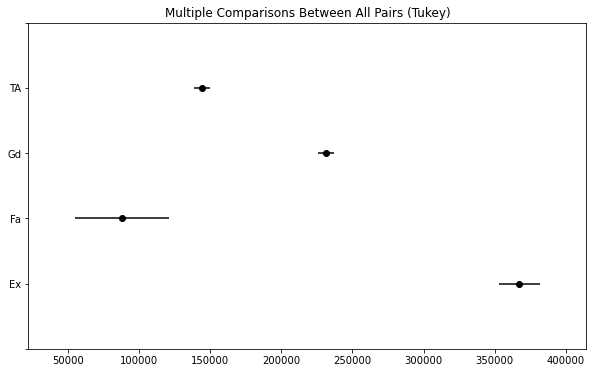

In [165]:
tukey_ExterQual.plot_simultaneous()

### LINEAR REGRESSION FOR REDCED_DATA2

In [166]:
model1=ols(formula='SalePrice~LotAreaNew+GarageAreaNew+GrLivAreaNew+YearBuiltNew+LotShape+RoofStyle+RoofMatl+Exterior1st+GarageType+Foundation+Neighborhood+HouseStyle+BldgType+SaleCondition+CentralAir+Heating+Electrical+ExterQual',data=reduced_data2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     98.64
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:01:20   Log-Likelihood:                -17494.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1413   BIC:                         3.533e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### REDUCING LEVELS UNDER EACH CATEGOTY IF P_VAL IS MORE THAN 5%

In [167]:
reduced_data3 = reduced_data2[:]

### LotShape:

In [168]:
reduced_data3.LotShape.value_counts()

Reg    925
IR1    494
IR2     41
Name: LotShape, dtype: int64

#### The average price of house is equal for Lot Shape IR1=IR2

#### The average price of house is equal for Lot Shape IR1=Reg

#### So, we are dropping the variable

In [169]:
del reduced_data3['LotShape']

### RoofStyle: 

In [170]:
reduced_data3.RoofStyle.value_counts()

Gable    1172
Hip       288
Name: RoofStyle, dtype: int64

### RoofMatl:

In [171]:
reduced_data3.RoofMatl.value_counts()

CompShg    1447
WdShngl       6
WdShake       6
Roll          1
Name: RoofMatl, dtype: int64

In [172]:
reduced_data3['RoofMatl']=reduced_data3['RoofMatl'].replace('Roll','CompShg')
reduced_data3.RoofMatl.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\1474130878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['RoofMatl']=reduced_data3['RoofMatl'].replace('Roll','CompShg')


CompShg    1448
WdShngl       6
WdShake       6
Name: RoofMatl, dtype: int64

In [173]:
#reduced_data3['RoofMatl']=reduced_data3['RoofMatl'].replace('WdShake','CompShg')
#reduced_data3.RoofMatl.value_counts()

### Exterior1st:

In [174]:
reduced_data3.Exterior1st.value_counts()

VinylSd    576
HdBoard    355
Wd Sdng    232
MetalSd    220
BrkFace     50
AsbShng     22
Stone        3
BrkComm      2
Name: Exterior1st, dtype: int64

In [175]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('BrkComm','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\3832317425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('BrkComm','AsbShng')


VinylSd    576
HdBoard    355
Wd Sdng    232
MetalSd    220
BrkFace     50
AsbShng     24
Stone        3
Name: Exterior1st, dtype: int64

In [176]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('HdBoard','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\2496156794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('HdBoard','AsbShng')


VinylSd    576
AsbShng    379
Wd Sdng    232
MetalSd    220
BrkFace     50
Stone        3
Name: Exterior1st, dtype: int64

In [177]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('MetalSd','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\739344757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('MetalSd','AsbShng')


AsbShng    599
VinylSd    576
Wd Sdng    232
BrkFace     50
Stone        3
Name: Exterior1st, dtype: int64

In [178]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('Stone','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\879941383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('Stone','AsbShng')


AsbShng    602
VinylSd    576
Wd Sdng    232
BrkFace     50
Name: Exterior1st, dtype: int64

In [179]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('Vinylsd','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\872545814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('Vinylsd','AsbShng')


AsbShng    602
VinylSd    576
Wd Sdng    232
BrkFace     50
Name: Exterior1st, dtype: int64

In [180]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('Wd Sdng','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\1410193409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('Wd Sdng','AsbShng')


AsbShng    834
VinylSd    576
BrkFace     50
Name: Exterior1st, dtype: int64

In [181]:
reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('VinylSd','AsbShng')
reduced_data3.Exterior1st.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\2866088612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Exterior1st']=reduced_data3['Exterior1st'].replace('VinylSd','AsbShng')


AsbShng    1410
BrkFace      50
Name: Exterior1st, dtype: int64

### GarageType: 

In [182]:
reduced_data3.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     25
CarPort      9
Name: GarageType, dtype: int64

In [183]:
reduced_data3['GarageType']=reduced_data3['GarageType'].replace('Basment','Attchd')
reduced_data3.GarageType.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\1195554977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['GarageType']=reduced_data3['GarageType'].replace('Basment','Attchd')


Attchd     976
Detchd     387
BuiltIn     88
CarPort      9
Name: GarageType, dtype: int64

In [184]:
reduced_data3['GarageType']=reduced_data3['GarageType'].replace('BuiltIn','Attchd')
reduced_data3.GarageType.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\861329646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['GarageType']=reduced_data3['GarageType'].replace('BuiltIn','Attchd')


Attchd     1064
Detchd      387
CarPort       9
Name: GarageType, dtype: int64

### Foundation:

In [185]:
reduced_data3.Foundation.value_counts()

PConc     647
CBlock    643
BrkTil    146
Slab       24
Name: Foundation, dtype: int64

In [186]:
reduced_data3['Foundation']=reduced_data3['Foundation'].replace('CBlock','BrkTil')
reduced_data3.Foundation.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\1096874375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Foundation']=reduced_data3['Foundation'].replace('CBlock','BrkTil')


BrkTil    789
PConc     647
Slab       24
Name: Foundation, dtype: int64

In [187]:
reduced_data3['Foundation']=reduced_data3['Foundation'].replace('PConc','BrkTil')
reduced_data3.Foundation.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\2361048899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['Foundation']=reduced_data3['Foundation'].replace('PConc','BrkTil')


BrkTil    1436
Slab        24
Name: Foundation, dtype: int64

### Neighborhood:

In [188]:
reduced_data3.Neighborhood.value_counts()

CollgCr    327
NAmes      283
OldTown    212
Edwards    158
NridgHt    143
NWAmes     132
Somerst     86
IDOTRR      70
Timber      49
Name: Neighborhood, dtype: int64

### HouseStyle: 

In [189]:
reduced_data3.HouseStyle.value_counts()

1Story    726
2Story    453
1.5Fin    179
Slvl       65
SFoyer     37
Name: HouseStyle, dtype: int64

In [190]:
reduced_data3['HouseStyle']=reduced_data3['HouseStyle'].replace('2Story','1.5Fin')
reduced_data3.HouseStyle.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\1611959940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['HouseStyle']=reduced_data3['HouseStyle'].replace('2Story','1.5Fin')


1Story    726
1.5Fin    632
Slvl       65
SFoyer     37
Name: HouseStyle, dtype: int64

In [191]:
reduced_data3['HouseStyle']=reduced_data3['HouseStyle'].replace('SFoyer','1.5Fin')
reduced_data3.HouseStyle.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\3515921015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['HouseStyle']=reduced_data3['HouseStyle'].replace('SFoyer','1.5Fin')


1Story    726
1.5Fin    669
Slvl       65
Name: HouseStyle, dtype: int64

### BldgType: 

In [192]:
reduced_data3.BldgType.value_counts()

1Fam      1220
Duplex     126
TwnhsE     114
Name: BldgType, dtype: int64

In [193]:
reduced_data3['BldgType']=reduced_data3['BldgType'].replace('Duplex','1Fam')
reduced_data3.BldgType.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\3023793246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['BldgType']=reduced_data3['BldgType'].replace('Duplex','1Fam')


1Fam      1346
TwnhsE     114
Name: BldgType, dtype: int64

### SaleCondition:

In [194]:
reduced_data3.SaleCondition.value_counts()

Normal     1198
Abnorml     137
Partial     125
Name: SaleCondition, dtype: int64

In [195]:
reduced_data3['SaleCondition']=reduced_data3['SaleCondition'].replace('Abnorml','Normal')
reduced_data3.SaleCondition.value_counts()

C:\Users\MASHKOOR KHADER\AppData\Local\Temp\ipykernel_10852\4018953467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_data3['SaleCondition']=reduced_data3['SaleCondition'].replace('Abnorml','Normal')


Normal     1335
Partial     125
Name: SaleCondition, dtype: int64

### Heating:

In [196]:
reduced_data3.Heating.value_counts()

GasA    1446
Wall      14
Name: Heating, dtype: int64

### "the average sale price of the house with gas A and wall are equal"

In [197]:
del reduced_data3['Heating']

### Electrical:

In [198]:
reduced_data3.Electrical.value_counts()

SBrkr    1335
FuseA     125
Name: Electrical, dtype: int64

### "the average sale price of the house with Sbrkr and FuseA are equal"

In [199]:
del reduced_data3['Electrical']

In [200]:
reduced_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   SalePrice      1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   GrLivArea      1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   RoofStyle      1460 non-null   object 
 7   RoofMatl       1460 non-null   object 
 8   Exterior1st    1460 non-null   object 
 9   GarageType     1460 non-null   object 
 10  Foundation     1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  SaleCondition  1460 non-null   object 
 15  CentralAir     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  LotAreaNew     1460 non-null   float64
 18  GarageAr

In [201]:
model2=ols(formula='SalePrice~LotAreaNew+GarageAreaNew+GrLivAreaNew+YearBuiltNew+RoofStyle+RoofMatl+Exterior1st+GarageType+Foundation+Neighborhood+HouseStyle+BldgType+SaleCondition+CentralAir++ExterQual',data=reduced_data3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     166.5
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:01:21   Log-Likelihood:                -17507.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1432   BIC:                         3.522e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [202]:
reduced_data3.to_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\houseprice\\reduced_data3.csv',index=False)

# Checking Multi-Colinearity by Checking VIF

In [203]:
reduced_data3.head()

,Id,SalePrice,LotArea,GarageArea,GrLivArea,YearBuilt,RoofStyle,RoofMatl,Exterior1st,GarageType,...,Neighborhood,HouseStyle,BldgType,SaleCondition,CentralAir,ExterQual,LotAreaNew,GarageAreaNew,GrLivAreaNew,YearBuiltNew
0,1,208500,8450,548,1710,2003,Gable,CompShg,AsbShng,Attchd,...,CollgCr,1.5Fin,1Fam,Normal,Y,Gd,8450.0,548.0,1710.0,2003
1,2,181500,9600,460,1262,1976,Gable,CompShg,AsbShng,Attchd,...,Timber,1Story,1Fam,Normal,Y,TA,9600.0,460.0,1262.0,1976
2,3,223500,11250,608,1786,2001,Gable,CompShg,AsbShng,Attchd,...,CollgCr,1.5Fin,1Fam,Normal,Y,Gd,11250.0,608.0,1786.0,2001
3,4,140000,9550,642,1717,1915,Gable,CompShg,AsbShng,Detchd,...,CollgCr,1.5Fin,1Fam,Normal,Y,TA,9550.0,642.0,1717.0,1915
4,5,250000,14260,836,2198,2000,Gable,CompShg,AsbShng,Attchd,...,NridgHt,1.5Fin,1Fam,Normal,Y,Gd,14260.0,836.0,2198.0,2000


In [204]:
x = reduced_data3.iloc[:,[-1,-2,-3,-4]]

In [205]:
vif = pd.DataFrame()

In [206]:
vif['feature'] = x.columns

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [208]:
vif.head()

,feature,VIF
0,YearBuiltNew,16.340348
1,GrLivAreaNew,13.071604
2,GarageAreaNew,7.975142
3,LotAreaNew,11.441302


### We See their is multicolinerity between YearBuilt,LotArea and GrLivAreaNew as the value is more than 10 so we drop both the Variables

In [209]:
del reduced_data3['YearBuiltNew']

In [210]:
del reduced_data3['GrLivAreaNew']

In [211]:
del reduced_data3['LotAreaNew']

In [212]:
model3=ols(formula='SalePrice~GarageAreaNew+RoofStyle+RoofMatl+Exterior1st+GarageType+Foundation+Neighborhood+HouseStyle+BldgType+SaleCondition+CentralAir++ExterQual',data=reduced_data3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     169.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:01:21   Log-Likelihood:                -17564.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1435   BIC:                         3.531e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [213]:
reduced_data4 = reduced_data3.copy()

In [214]:
reduced_data4.to_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\houseprice\\reduced_data4.csv',index=False)

In [215]:
residual3=pd.read_csv('C:\\Users\\MASHKOOR KHADER\\Desktop\\project_ML\\houseprice\\residual3.csv')

## 1.Linerarity Test: Validated

## 2.Normality Test

array([[<AxesSubplot:title={'center':'Residuals'}>]], dtype=object)

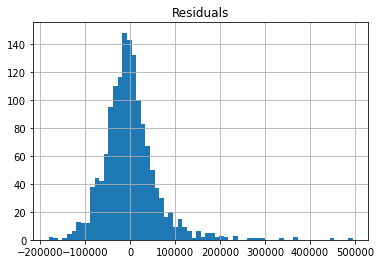

In [216]:
residual3.hist('Residuals', bins = 'auto')

<AxesSubplot:>

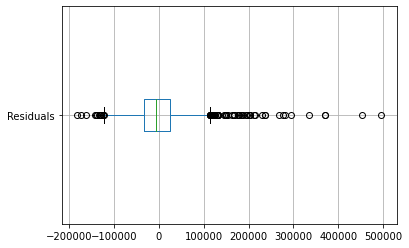

In [217]:
residual3.boxplot('Residuals', vert=False)

### "In the above plot we can conclude that its is normal in nature" 

## 3.Independency test

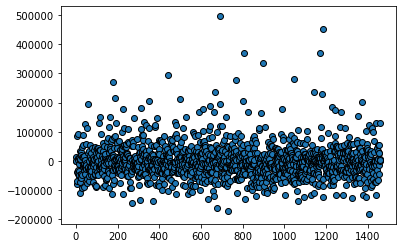

In [218]:
plt.scatter(x=residual3.Observation,y=residual3.Residuals, alpha = 1, edgecolor='black')

### 'Error terms are independent so there is no biasedness'

## 4.Homoscedasticity

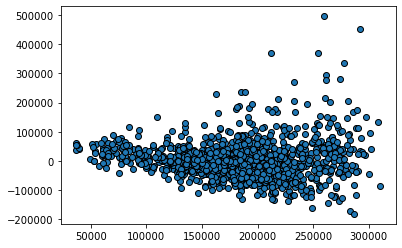

In [219]:
plt.scatter(x=residual3['Predicted SalePrice'],y=residual3['Residuals'], alpha = 1, edgecolor='black')

### "The Varience in the upperpart and the lower part are identicle hence there is no heteroscedasticity " 

In [220]:
#Final*******************************************************************#

# ************************************END****************************************